## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Get the data

In [ ]:
import os
import requests
import zipfile
import pandas as pd


url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"
def fetch_song_data():
    # Faz o download do arquivo zip
    response = requests.get(url)
    with open(zip_path, "wb") as file:
        file.write(response.content)
    os.makedirs(extract_path, exist_ok=True)

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)

    csv_path = os.path.join(extract_path, "spotify_songs.csv")
    songs = pd.read_csv(csv_path)
    print(songs.head())

In [5]:
fetch_song_data()

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

## Load a CSV File into a Pandas DataFrame

In [6]:
def load_song_data(song_path=SONG_PATH):
    csv_path = os.path.join(song_path, "song_data.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [7]:
songs = load_song_data()
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [9]:
pd.set_option('display.max_rows', None)
songs["playlist_genre"].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [10]:
# Agrupar por 'playlist_genre' e calcular a média da popularidade
genre_popularity = songs.groupby("playlist_genre")["track_popularity"].mean()

# Ordenar os resultados em ordem decrescente
genre_popularity_sorted = genre_popularity.sort_values(ascending=False)

# Exibir os gêneros com músicas mais populares
print(genre_popularity_sorted)


playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64


In [11]:
# Encontrar o valor máximo de popularidade
max_popularity = songs["track_popularity"].max()

# Filtrar todas as músicas com a popularidade máxima
most_popular_songs = songs[songs["track_popularity"] == max_popularity]

# Exibir o resultado
print(most_popular_songs[["track_name", "track_popularity"]])


         track_name  track_popularity
1551   Dance Monkey               100
20091  Dance Monkey               100


In [12]:
# Ordenar as músicas pela popularidade em ordem decrescente
songs_sorted = songs.sort_values(by="track_popularity", ascending=False)

# Exibir apenas o nome das músicas, nome dos artistas e suas popularidades
(songs_sorted[["track_name", "track_popularity", "track_artist"]]).head(20)

,track_name,track_popularity,track_artist
20091,Dance Monkey,100,Tones and I
1551,Dance Monkey,100,Tones and I
21468,ROXANNE,99,Arizona Zervas
20092,ROXANNE,99,Arizona Zervas
23104,ROXANNE,99,Arizona Zervas
30202,ROXANNE,99,Arizona Zervas
9018,The Box,98,Roddy Ricch
1301,Circles,98,Post Malone
18308,Memories,98,Maroon 5
18307,Blinding Lights,98,The Weeknd


In [13]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


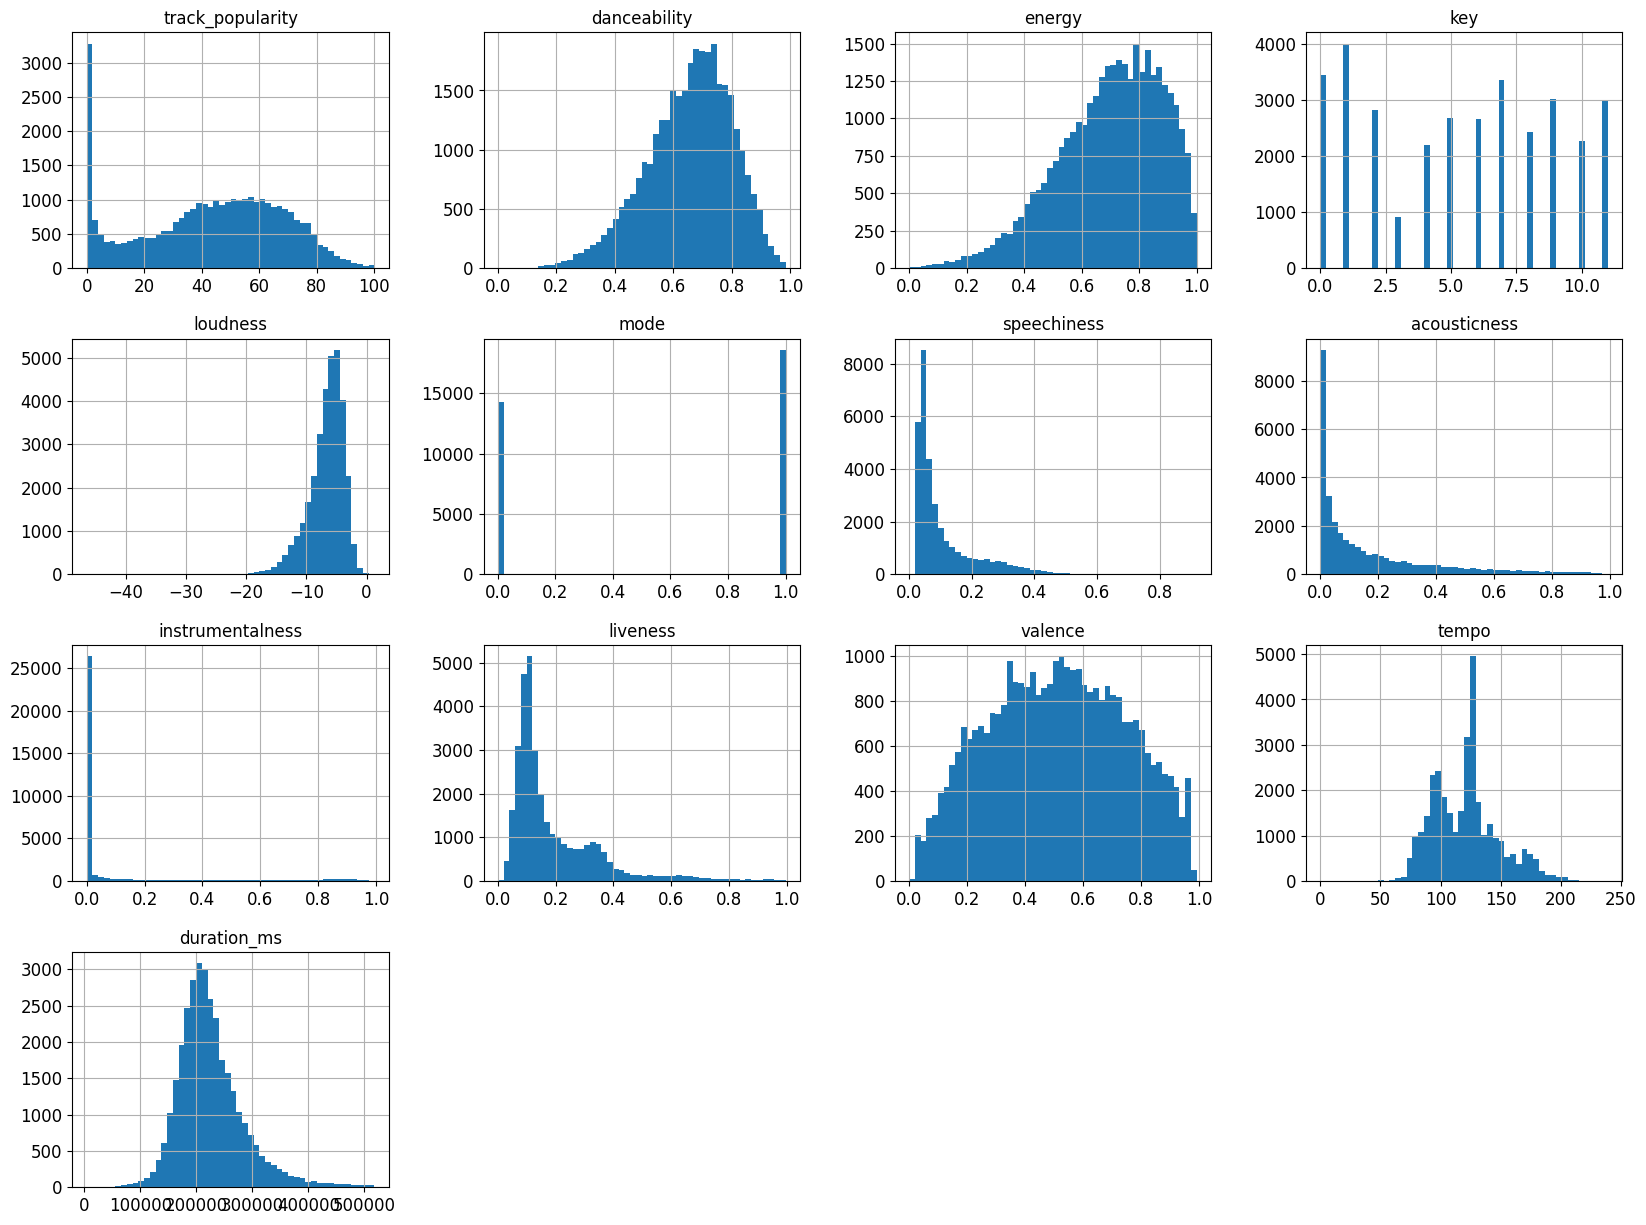

In [14]:
import matplotlib.pyplot as plt
songs.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Set Test

In [15]:
#to make this notebook's output identical at every run
np.random.seed(42)

In [16]:
import numpy as np# Use train_test_split to split the data into a training set and a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [17]:
len(test_set)

6567

## Criar uma cópia do conjunto de treino

In [18]:
songs_cp = songs.copy()

## Retirar músicas duplicadas

In [37]:
# Remover duplicatas, mantendo apenas uma ocorrência de cada 'track_name' e 'track_artist'
#songs_cp_unique = songs_cp.drop_duplicates(subset=["track_name", "track_artist"])

songs_cp_unique = songs_cp.drop_duplicates(subset=["track_id"])

#songs_cp_unique = songs_cp

# Ordenar pela popularidade para manter a ordem
#songs_cp_sorted = songs_cp_unique.sort_values(by="track_popularity", ascending=False)
songs_cp_sorted = songs_cp_unique.sort_values(by=["track_name", "track_artist"], ascending=False)


# Exibir as músicas sem duplicatas
songs_cp_sorted[["track_name", "track_popularity", "track_artist"]].head(20)

# Selecionar linha de indice do dataframe songs_cp_sorted com track_id 2XU0oxnq2qxCpomAAuJY8K
#songs_cp.loc[songs_cp["track_id"] == "2XU0oxnq2qxCpomAAuJY8K"]


,track_name,track_popularity,track_artist
471,하드캐리 Hard Carry,1,GOT7
445,피카부 Peek-A-Boo,70,Red Velvet
30481,중독 Overdose,4,EXO-K
30518,쉼표,30,Kozypop
26359,숙녀 (淑女) Lady,17,Yubin
30482,소방차 Fire Truck,0,NCT 127
30471,불타오르네 FIRE,0,BTS
1041,달라달라 DALLA DALLA,52,ITZY
30494,걔 세 I'm Him,0,WINNER
11393,霧のDOWN TOWN,28,オメガトライブ


In [20]:
songs_cp.sort_values(by="track_popularity", ascending=False)[["track_name", "track_popularity", "track_artist"]].head(20)

,track_name,track_popularity,track_artist
20091,Dance Monkey,100,Tones and I
1551,Dance Monkey,100,Tones and I
21468,ROXANNE,99,Arizona Zervas
20092,ROXANNE,99,Arizona Zervas
23104,ROXANNE,99,Arizona Zervas
30202,ROXANNE,99,Arizona Zervas
9018,The Box,98,Roddy Ricch
1301,Circles,98,Post Malone
18308,Memories,98,Maroon 5
18307,Blinding Lights,98,The Weeknd


In [38]:
len(songs_cp_sorted)

28356